In [15]:
# 1. Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [16]:
# 2. Load and preprocess the dataset
# Generate a synthetic dataset with 300 samples and 2 features
data, labels = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [17]:
# 3. Implement the K-means algorithm
def initialize_centroids(data, k):
    """Initialization - Select k random data points as initial centroids"""
    return data[np.random.choice(data.shape[0], k, replace=False)]

def compute_distances(data, centroids):
    """Compute the Euclidean distances between each data point and the centroids"""
    return np.sqrt(((data[:, None] - centroids) ** 2).sum(-1))

def assign_clusters(distances):
    """Assign each data point to the cluster with the closest centroid"""
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    """Update the centroids by computing the mean of the data points in each cluster"""
    return np.array([data[clusters == i].mean(axis=0) for i in range(k)])

def k_means(data, k, max_iterations=100):
    """Implement the K-means clustering algorithm"""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [18]:
# 4. Evaluate the results
k = 4
centroids, clusters = k_means(data_scaled, k)
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares:", wcss)


Total within-cluster sum of squares: 69.89229025270971


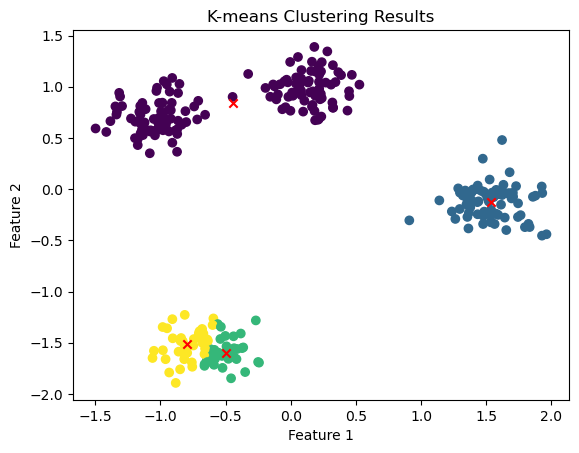

In [19]:
# 5. Visualize the clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

In [20]:
# 6. Implement the K-medians algorithm
def initialize_centroids(data, k):
    """Initialization - Split the data into k initial clusters"""
    return data[np.random.choice(data.shape[0], k, replace=False)]

def compute_distances(data, centroids):
    """Compute the Manhattan distances between each data point and the centroids"""
    return np.sum(np.abs(data[:, None] - centroids), axis=-1)

def assign_clusters(distances):
    """Assign each data point to the cluster with the closest centroid"""
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    """Update the centroids by computing the median of the data points in each cluster"""
    return np.array([np.median(data[clusters == i], axis=0) for i in range(k)])

def k_median(data, k, max_iterations=100):
    """Implement the K-medians clustering algorithm"""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters


In [21]:
# 7. Implement the K-medoids algorithm
def initialize_medoids(data, k):
    """Initialization - Select k random data points as initial medoids"""
    return data[np.random.choice(data.shape[0], k, replace=False)]

def compute_dissimilarities(data, medoids):
    """Compute the dissimilarities between each data point and the medoids"""
    return np.sqrt(((data[:, None] - medoids) ** 2).sum(-1))

def assign_clusters(dissimilarities):
    """Assign each data point to the cluster with the closest medoid"""
    return np.argmin(dissimilarities, axis=1)

def update_medoids(data, clusters, k):
    """Update the medoids by selecting the data point with the minimum sum of dissimilarities in each cluster"""
    return np.array([data[clusters == i][np.argmin(np.sum(np.sqrt(((data[clusters == i] - data[clusters == i][j]) ** 2).sum(-1)) for j in range(data[clusters == i].shape[0]))) ] for i in range(k)])

def k_medoids(data, k, max_iterations=100):
    """Implement the K-medoids clustering algorithm"""
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.array_equal(medoids, new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters

C:\Users\l2151\AppData\Local\Temp\ipykernel_2828\1708110569.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.array([data[clusters == i][np.argmin(np.sum(np.sqrt(((data[clusters == i] - data[clusters == i][j]) ** 2).sum(-1)) for j in range(data[clusters == i].shape[0]))) ] for i in range(k)])


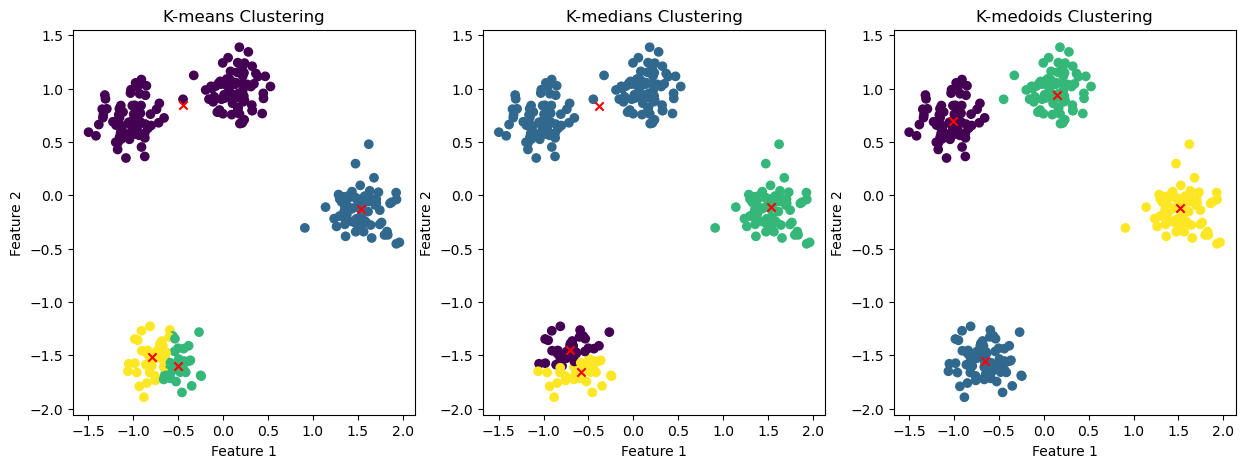

In [23]:
# 8. Visualize the results for all three algorithms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# K-means
ax = axes[0]
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
ax.set_title('K-means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# K-medians
centroids_medians, clusters_medians = k_median(data_scaled, k)
ax = axes[1]
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_medians, cmap='viridis')
ax.scatter(centroids_medians[:, 0], centroids_medians[:, 1], c='red', marker='x')
ax.set_title('K-medians Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# K-medoids
medoids, clusters_medoids = k_medoids(data_scaled, k)
ax = axes[2]
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_medoids, cmap='viridis')
ax.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x')
ax.set_title('K-medoids Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

plt.show()